# Do Treasury Yields Affect the S&P 500?

## Data Models Creation and Transformation

In [267]:
# Download data sets
import pandas as pd
# Download historical S&P 500 historical data
hist_sp500 = pd.read_csv('C:/Users/emili/OneDrive - Bellevue University/Summer 2024/DSC 530 Data Exploration and Analysis/Milestone Project/HistoricalPrices.csv')

# Download historical daily treasury yields one month rate to 30 years rate
daily_ycr = pd.read_csv('C:/Users/emili/OneDrive - Bellevue University/Summer 2024/DSC 530 Data Exploration and Analysis/Milestone Project/yield-curve-rates-1990-2024ytd.csv')

In [271]:
# Transform 'Date" Columns into date format
hist_sp500['Date'] = pd.to_datetime(hist_sp500['Date'])
daily_ycr['Date'] = pd.to_datetime(daily_ycr['Date'])

# Merge data frames
sp500_yieldcr_df = pd.merge(hist_sp500, daily_ycr, on='Date', how='outer')

# Sort data frame by date
sp500_yieldcr_df = sp500_yieldcr_df.sort_values(by='Date')

# Forward and backfill empty cells
sp500_yieldcr_df.ffill(inplace=True)
sp500_yieldcr_df.bfill(inplace=True)

# Condense data frame. Subtract dependent value and 5 independent variables
columns_to_select = ['Date', ' Close', '1 Mo', '3 Mo', '6 Mo', '20 Yr', '30 Yr']
clean_df = sp500_yieldcr_df[columns_to_select]

print(clean_df.head())

           Date   Close  1 Mo  3 Mo  6 Mo  20 Yr  30 Yr
8706 1990-01-02  359.69  3.67  7.83  7.89   6.12   8.00
8705 1990-01-03  358.76  3.67  7.89  7.94   6.12   8.04
8704 1990-01-04  355.67  3.67  7.84  7.90   6.12   8.04
8703 1990-01-05  352.20  3.67  7.79  7.85   6.12   8.06
8702 1990-01-08  353.79  3.67  7.79  7.88   6.12   8.09


## Description - All Variables

- Date: dates between 01/01/1990 and 07/24/2024 in a date time format
- Close: The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States. The "Close" variable is the closing price of the S&P 500 index on a specific date.
- 1 Mo: the return on investment in U.S. government debt obligations expected to mature in 1 month. 
- 3 Mo: the return on investment in U.S. government debt obligations expected to mature in 3 months. 
- 6 Mo: the return on investment in U.S. government debt obligations expected to mature in 6 months. 
- 20 Yr: the return on investment in U.S. government debt obligations expected to mature in 20 years. 
- 30 Yr: the return on investment in U.S. government debt obligations expected to mature in 30 years. 

## Histograms

In [118]:
import matplotlib.pyplot as plt

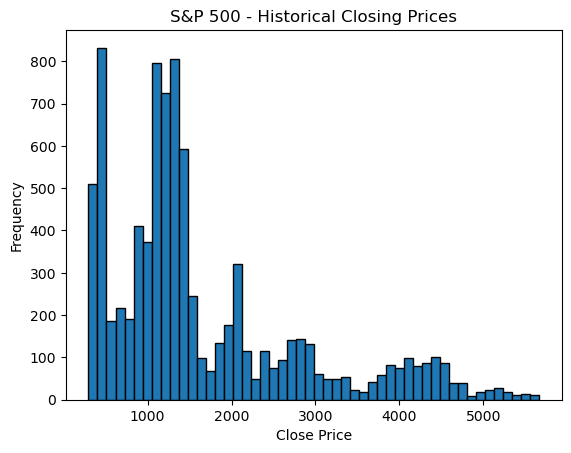

In [275]:
# Substract S&P 500 closing prices
hist_close = clean_df[' Close']

# Create plot
plt.hist(hist_close, bins=50, edgecolor='black')

# Labels
plt.title("S&P 500 - Historical Closing Prices")
plt.xlabel('Close Price')
plt.ylabel('Frequency')

plt.show()

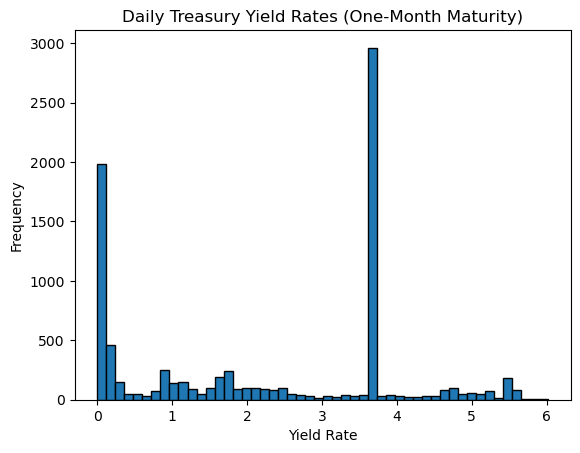

In [277]:
# Substract Daily Treasury Yield Rates (One-Month Maturity)
hist_1mo = clean_df['1 Mo']

# Create plot
plt.hist(hist_1mo, bins=50, edgecolor='black')

# Labels
plt.title("Daily Treasury Yield Rates (One-Month Maturity)")
plt.xlabel('Yield Rate')
plt.ylabel('Frequency')

plt.show()

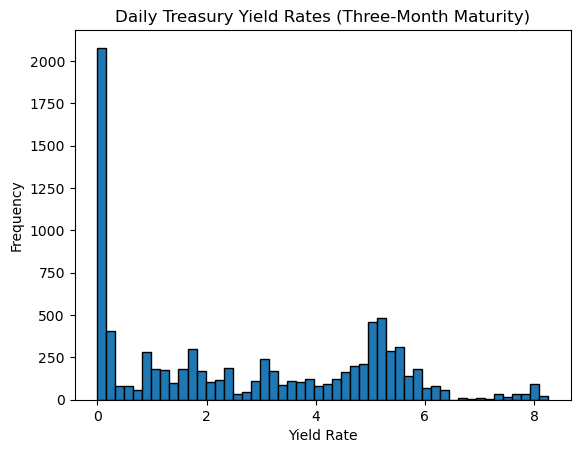

In [279]:
# Substract Daily Treasury Yield Rates (Three-Month Maturity)
hist_3mo = clean_df['3 Mo']

# Create plot
plt.hist(hist_3mo, bins=50, edgecolor='black')

# Labels
plt.title("Daily Treasury Yield Rates (Three-Month Maturity)")
plt.xlabel('Yield Rate')
plt.ylabel('Frequency')

plt.show()

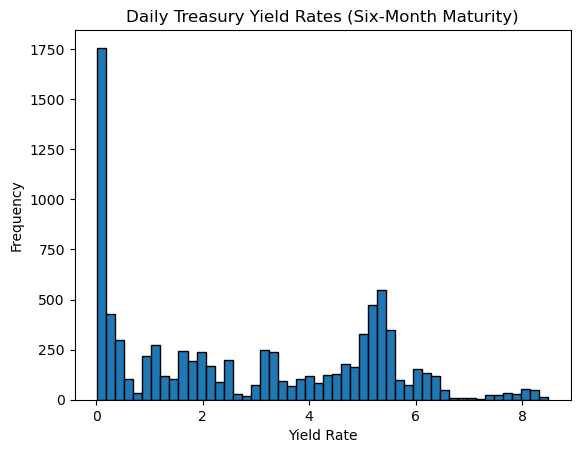

In [281]:
# Substract Daily Treasury Yield Rates (Six-Month Maturity)
hist_6mo = clean_df['6 Mo']

# Create Plot
plt.hist(hist_6mo, bins=50, edgecolor='black')

# Labels
plt.title("Daily Treasury Yield Rates (Six-Month Maturity)")
plt.xlabel('Yield Rate')
plt.ylabel('Frequency')

plt.show()

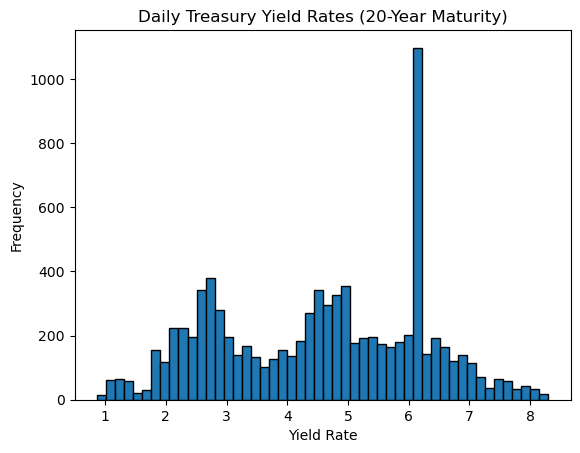

In [283]:
# Substract Daily Treasury Yield Rates (20-Year Maturity)
hist_20yr = clean_df['20 Yr']

# Create Plot
plt.hist(hist_20yr, bins=50, edgecolor='black')

# Labels
plt.title("Daily Treasury Yield Rates (20-Year Maturity)")
plt.xlabel('Yield Rate')
plt.ylabel('Frequency')

plt.show()

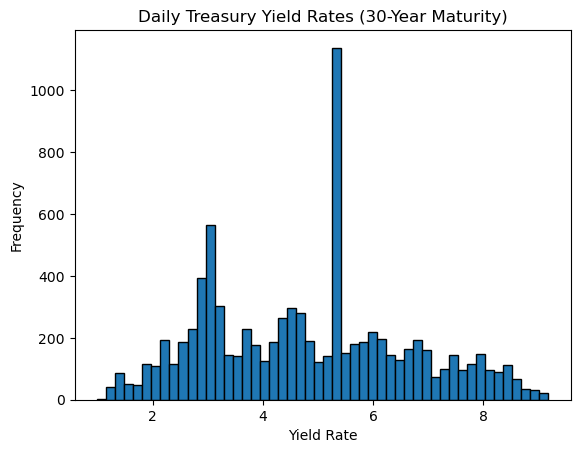

In [285]:
# Substract Daily Treasury Yield Rates (30-Year Maturity)
hist_30yr = clean_df['30 Yr']

# Create Plot
plt.hist(hist_30yr, bins=50, edgecolor='black')

# Labels
plt.title("Daily Treasury Yield Rates (30-Year Maturity)")
plt.xlabel('Yield Rate')
plt.ylabel('Frequency')

plt.show()

## Descriptive Charecteristics About Variables

In [311]:
# for loop that calculates descriptive characteristics about the data frame
for column in clean_df.columns:
    if column != 'Date':
        mean = round(clean_df[column].mean(), 2)
        mode = round(clean_df[column].mode(), 2)
        std = round(clean_df[column].std(), 2)
        skewness = round(clean_df[column].skew(), 2)
        kurtosis = round(clean_df[column].kurtosis(), 2)
        
        print(f"Descriptive statistics for {column}:")
        print(f"Mean: {mean}")
        print(f"Mode: {mode.values}")
        print(f"Standard Deviation: {std}")
        print(f"Skewness: {skewness}")
        print(f"Kurtosis: {kurtosis}")
        print()

Descriptive statistics for  Close:
Mean: 1642.66
Mode: [1092.54]
Standard Deviation: 1172.76
Skewness: 1.3
Kurtosis: 0.97

Descriptive statistics for 1 Mo:
Mean: 2.22
Mode: [3.67]
Standard Deviation: 1.75
Skewness: 0.03
Kurtosis: -1.43

Descriptive statistics for 3 Mo:
Mean: 2.73
Mode: [0.02]
Standard Deviation: 2.3
Skewness: 0.29
Kurtosis: -1.24

Descriptive statistics for 6 Mo:
Mean: 2.85
Mode: [0.06]
Standard Deviation: 2.33
Skewness: 0.26
Kurtosis: -1.26

Descriptive statistics for 20 Yr:
Mean: 4.56
Mode: [6.12]
Standard Deviation: 1.67
Skewness: -0.12
Kurtosis: -1.0

Descriptive statistics for 30 Yr:
Mean: 4.81
Mode: [5.37]
Standard Deviation: 1.82
Skewness: 0.22
Kurtosis: -0.76



## Create a PMF

In [289]:
# Creating Two Scenarios Before and After the 2008 Financial Crisis
before2008_df = clean_df[clean_df['Date'] < '2008-01-01']
after2008_df = clean_df[clean_df['Date'] > '2008-01-01']

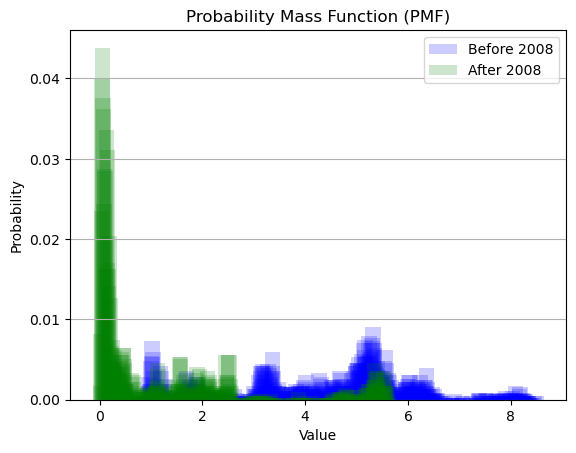

In [291]:
frequency1 = before2008_df['6 Mo'].value_counts().sort_index()
pmf1 = frequency1 / frequency1.sum()

frequency2 = after2008_df['6 Mo'].value_counts().sort_index()
pmf2 = frequency2 / frequency2.sum()

plt.bar(pmf1.index, pmf1.values, width=0.3, color='blue', alpha=0.2, label="Before 2008")
plt.bar(pmf2.index, pmf2.values, width=0.3, color='green', alpha=0.2, label="After 2008")
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.title('Probability Mass Function (PMF)')
plt.grid(axis='y')
plt.show()

## Create a CDF

This CDf shows that the closing price of the S&P 500 has been lower than 2000 points for almost 80% of the time since 1990. This shows that most of the growth of the index occurred recently. Furthermore, as shown in the PMF above, it can be observed that most of the growth of the index occurred after the 2008 financial crisis. Finally, if the closing prices of the S&P 500 are compared with the treasury yields after 2008, an inversed relationship can be observed as the yields have ranged between 0% and 2% for the last 15 years.  

In [294]:
import numpy as np

In [296]:
# Select closing prices
closing_prices = clean_df[' Close']

# Sort the data
sorted_closing_prices = np.sort(closing_prices)

# Calculate the CDF values
cdf_closing_prices = np.arange(1, len(sorted_closing_prices) + 1) / len(sorted_closing_prices)

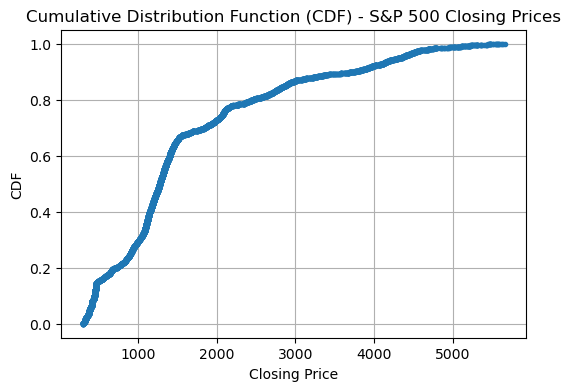

In [298]:
# Plot CDF
plt.figure(figsize=(6, 4))
plt.plot(sorted_closing_prices, cdf_closing_prices, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF) - S&P 500 Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

## Plot One Analytical Distribution
Log-normal distribution is normally used to analyze finances, such as stock prices, as these items cannot be negative and tend to be positively skewed. The log-normal distribution plotted in this analysis shows how the distribution of the 6-month treasury yield is positively skewed. It also shows that in the last 30 years, this yield curve has been relatively low (less than 1%). This might be evidence that not all the treasury yields have the same effect on the S&P 500 index as the 20-30-year rates have been, on average, higher than the 1-month and 6-month rates. A regression analysis might be needed to understand which rate has the strongest impact on the S&P 500. 

In [301]:
import scipy.stats as stats
import seaborn as sns

In [303]:
# Fit a lognormal distribution
shape, loc, scale = stats.lognorm.fit(clean_df['6 Mo'], floc=0)

# Generate x values for plotting the PDF
xmin, xmax = clean_df['6 Mo'].min(), clean_df['6 Mo'].max()
x = np.linspace(xmin, xmax, 100)

# Calculate the PDF
pdf = stats.lognorm.pdf(x, shape, loc, scale)


C:\Users\emili\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


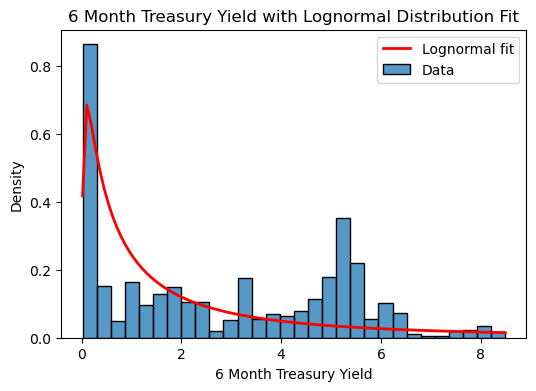

In [305]:
plt.figure(figsize=(6, 4))
sns.histplot(clean_df['6 Mo'], kde=False, stat="density", bins=30, label='Data')

# Plot the PDF
plt.plot(x, pdf, 'r-', lw=2, label='Lognormal fit')

plt.title('6 Month Treasury Yield with Lognormal Distribution Fit')
plt.xlabel('6 Month Treasury Yield')
plt.ylabel('Density')
plt.legend()
plt.show()


## Correlation vs Causation
Several methods were used to find and/or explain the correlation and causation between two variables, the six-month treasury yield and the S&P 500 index. 
The scatter plot below shows no obvious linear relationship between the six-month treasury yield and the S&P 500 closing prices. The covariance calculation resulted in a value of -716, which might indicate a negative correlation, yet it is hard to interpret. Hence, Pearson's correlation was calculated to normalize the relationship between these two variables. Pearson's correlation resulted in -0.26, which could be interpreted as a small to moderate inverse relationship between these variables. Finally, a non-linear relationship calculation was used to attempt to model the relationship between these two variables. A polynomial model was used to predict the closing prices of the S&P 500. Unfortunately, the R-squared value demonstrated that this model is not an accurate fit. 
This analysis proves that there is no strong relationship between the six-month treasury yield and the closing prices of the S&P 500. 

### Scatter Plot

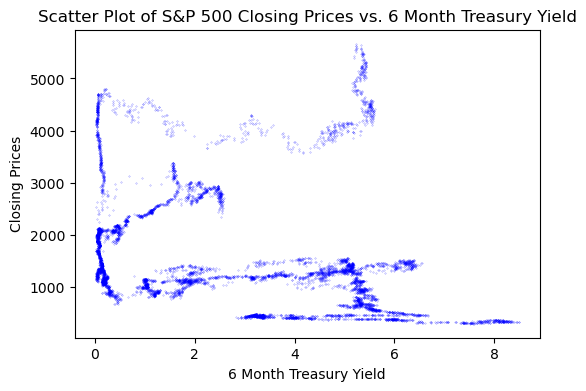

In [308]:
# Create the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(clean_df['6 Mo'], clean_df[' Close'], color='blue', alpha=0.6, s=.05)

# Labels
plt.xlabel('6 Month Treasury Yield')
plt.ylabel('Closing Prices')
plt.title('Scatter Plot of S&P 500 Closing Prices vs. 6 Month Treasury Yield')

# Show the plot
plt.show()

### Covariance

In [313]:
# Create a covariance matrix
cov_matrix = clean_df[[' Close', '6 Mo']].cov()

# Access the right item from the covariance matrix
cov_close_6mo = cov_matrix.loc[' Close', '6 Mo']

print("Covariance between Closing Price and 6 Month Treasury Yield:", cov_close_6mo)

Covariance between Closing Price and 6 Month Treasury Yield: -716.4168803910177


### Pearson's Correlation

In [316]:
# Standard deviations
std_close = np.sqrt(cov_matrix.loc[' Close', ' Close'])
std_6mo = np.sqrt(cov_matrix.loc['6 Mo', '6 Mo'])

# Correlation coefficient
correlation = cov_close_6mo / (std_close * std_6mo)

print("Correlation Coefficient between Closing Price and 6 Month Treasury Yield:", correlation)

Correlation Coefficient between Closing Price and 6 Month Treasury Yield: -0.2623894875108695


### Non-Linear Relationships

In [319]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x = clean_df[['6 Mo']]
y = clean_df[[' Close']]


# Fit a quadratic model
poly = PolynomialFeatures(degree=2)
model = make_pipeline(poly, LinearRegression())
model.fit(x, y)

# Predict values
predictions = model.predict(x)

# Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1278661.352525973
Root Mean Squared Error (RMSE): 1130.7790909483483


## Hypothesis Test
The Fisher's Null hypothesis testing was use to test this hypothesis: "Treasury yields affect the S&P 500". This testing measures the correlation of the data and the null hypothesis "Treasury yields do not affect the S&P 500". A regression analysis is needed to use the Fisher's Null Hypothesis method.  

### Regression Analysis

In [321]:
import statsmodels.api as sm

# Plot independent and dependent variables
x = clean_df[['1 Mo', '3 Mo', '6 Mo', '20 Yr', '30 Yr']]
y = clean_df[' Close']

# Add intercept
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3920.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:40:38   Log-Likelihood:                -68852.
No. Observations:                8719   AIC:                         1.377e+05
Df Residuals:                    8713   BIC:                         1.378e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4407.9129     22.951    192.057      0.0

### Interpretation of the Fisher's Null Hypothesis
The one-month, three-month, six-month, 20-year, and 30-year treasury yields were used to test the effect of treasury yields on the S&P 500. The regression analysis represented that all coefficients had a p-value lower than 0.05. Therefore, it can be concluded that all treasury yields significantly affect the S&P 500 closing prices, and the null hypothesis is rejected. 

# Sources
Daily Treasury Par Yield Curve Rates: https://home.treasury.gov/interest-rates-data-csv-archive

S&P 500 Historical data: https://www.wsj.com/market-data/quotes/index/SPX/historical-prices